<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/03.%ED%86%B5%EA%B3%84%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/ch03_02_%EC%97%AC%EB%9F%AC%EA%B0%80%EC%A7%80_%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.02. 여러가지 확률 분포
---
* 날짜: 2022.05.04
* 이름: 윤태우

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 지수 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp # 사이파이 -> 데이터 사이언스에 필요한 함수들 포함한 라이브러리
from scipy.stats import *  # * = 모든것을 임포트 하겠다는 뜻 
import warnings
warnings.filterwarnings('ignore')

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}   \mu = 뮤, 모수(파라미터) \sigma = 시그마, 모수(파라미터)
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [2]:
mu, std = 0, 1 # 표준 정규분포

norm = sp.stats.norm(mu, std)    # 확률 함수


* 확률 분포


In [19]:
X = np.linspace(-5,5,10) # -5부터 5까지 100개
P_X = norm.pdf(X) # 밀도함수
print(P_X)

[1.06220521e-15 3.49071894e-14 9.41531329e-13 2.08433780e-11
 3.78717060e-10 5.64774486e-09 6.91271583e-08 6.94441675e-07
 5.72580143e-06 3.87480834e-05]


* 누적 확률 분포


In [20]:
F_X = norm.cdf(X)
print(F_X)

[3.23833866e-16 1.12424361e-14 3.21330770e-13 7.56401374e-12
 1.46704038e-10 2.34550885e-09 3.09310872e-08 3.36688197e-07
 3.02771780e-06 2.25178504e-05]


* 표본 추출



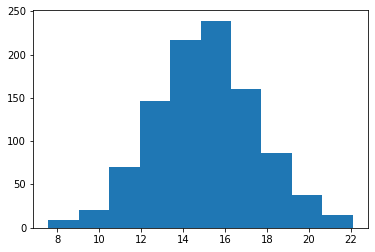

In [21]:
rvs = norm.rvs(1000, random_state = 0)
_ = plt.hist(rvs)

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

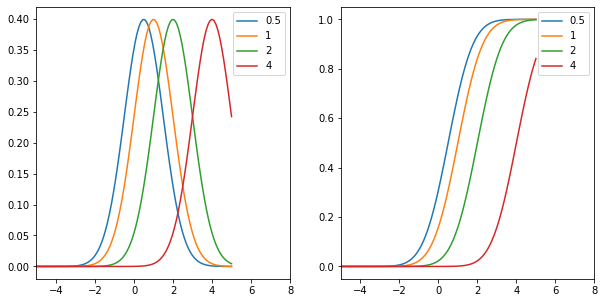

In [22]:
mus = [0.5, 1, 2, 4]
std = 1
X = np.linspace(-5,5,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes = axes.flatten()

for mu in mus :
  norm =sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 확률 함수


  axes[0].plot(X, P_X)  # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X)  # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # x 범위조절
  axes[1].set_xlim(-5,8) # x 범위조절
axes[0].legend(mus) # 라벨
axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

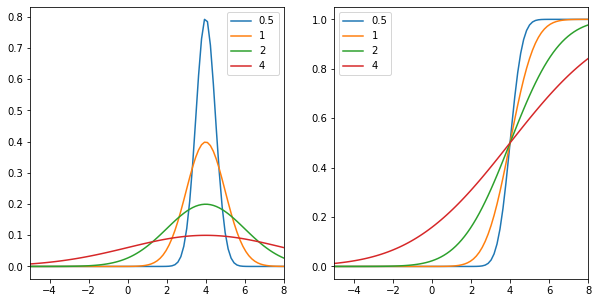

In [27]:
mus = 0
stds = [0.5, 1, 2, 4]
X = np.linspace(-5,10,100)

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes = axes.flatten()

for std in stds :
  norm = sp.stats.norm(mu, std)
  P_X = norm.pdf(X) # 확률 밀도 함수
  F_X = norm.cdf(X) # 누적 확률 함수


  axes[0].plot(X, P_X)  # X에 대한 확률 값 그래프
  axes[1].plot(X, F_X)  # X에 대한 누적 값 그래프
  axes[0].set_xlim(-5,8) # x 범위조절
  axes[1].set_xlim(-5,8) # x 범위조절
axes[0].legend(stds) # 라벨
axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

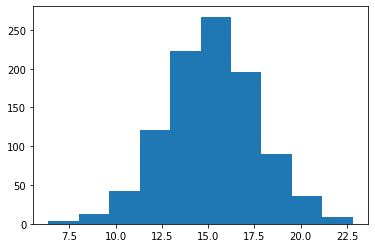

In [8]:
mu, std = 15.2, 2.5
norm = sp.stats.norm(mu, std)
rvs = norm.rvs(1000)

_ = plt.hist(rvs)

### **| 지수 분포**

\begin{cases}\lambda e^{-\lambda x}&x\geq 0\\0&x<0\end{cases}
**λ는 빈도를 나타내는 모수**

---



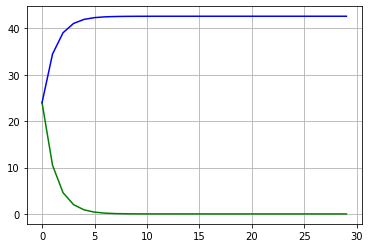

In [29]:
# lamnda 값 설정 (5일에 4번 커피를 한번 먹는 민수)
# 하루동안 커피를 먹을 확률 : 4/5
# 한달 동안이면 4/5*30
lam = 0.8*30
X = np.linspace(0, 1, 30)

def f(x) :
  if x >= 0 :
    return lam * np.exp(-lam*x)
  else :
    return 0

P = list(map(f,X))
F_P = np.cumsum(P)

plt.plot(P, color = 'green')
plt.plot(F_P, color = 'blue')
plt.grid()
plt.show()


### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [10]:
df = 2  # k개의 서로 독립적인 표준정규 확률변수를 각각 제곱한 다음 합해서 얻어지는 분포이다. 이 때 k를 자유도라고 하며, 카이제곱 분포의 매개변수가 된다.
X = np.linspace(0,20,201)
Y = sp.stats.chi2(df).pdf(X)

* 확률 분포


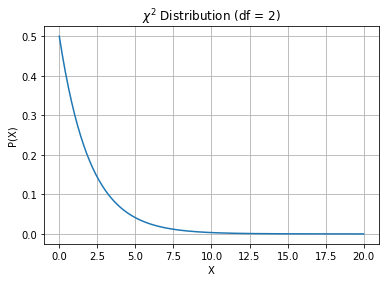

In [11]:
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title(f'$\chi^2$ Distribution (df = {df})')
plt.grid()
plt.show()

* 누적 확률 분포


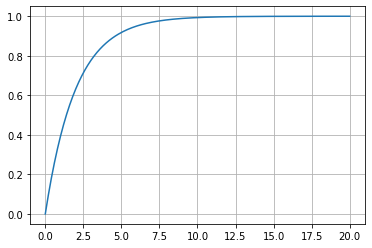

In [12]:
Y = sp.stats.chi2(df).cdf(X)
plt.plot(X,Y)
plt.grid()
plt.show()

* 표본 추출


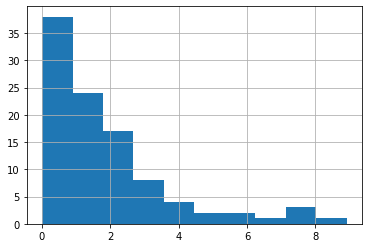

In [13]:
Y = sp.stats.chi2(df)
rvs = Y.rvs(100, random_state=0)
plt.hist(rvs)
plt.grid()
plt.show()

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

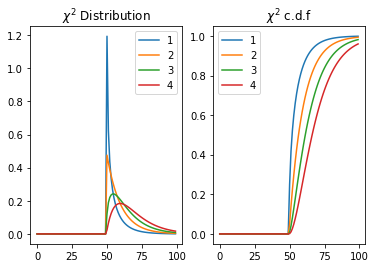

In [14]:
dfs = [1,2,3,4]
X = np.linspace(-10,10,100)
for df in dfs:
  Y = sp.stats.chi2(df)
  plt.subplot(1,2,1)
  plt.plot(Y.pdf(X))
  plt.legend(dfs)
  plt.title(f'$\chi^2$ Distribution')
  plt.subplot(1,2,2)
  plt.plot(Y.cdf(X))
  plt.legend(dfs)
  plt.title(f'$\chi^2$ c.d.f')
  plt.grid()
plt.show()

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

Gam(x;k,Θ)

k = 형상모수, (k > 0)
Θ = 척도모수, (Θ > 0)

In [15]:
# k=1,Θ =1/lambda }는 지수 분포가 된다.
a1 = [1,2,4,8]
b = 1
X = np.linspace(-10,20,100)

for a in a1 :
  Y = sp.stats.gamma(a,b)

* 확률 분포

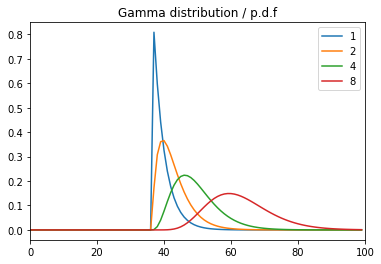

In [16]:
for a in a1 :
  Y = sp.stats.gamma(a,b)
  plt.plot(Y.pdf(X))
  plt.legend(a1)
  plt.title('Gamma distribution / p.d.f')
  plt.xlim(0,100)
  plt.grid()

* 누적 확률 분포


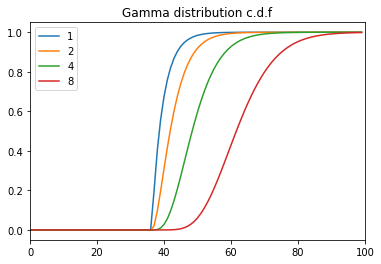

In [17]:
for a in a1 :
  Y = sp.stats.gamma(a,b)
  plt.plot(Y.cdf(X))
  plt.legend(a1)
  plt.title('Gamma distribution c.d.f')
  plt.xlim(0,100)
  plt.grid()

* 표본 추출

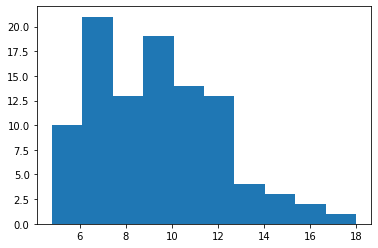

In [18]:
rvs = Y.rvs(100)
_=plt.hist(rvs)

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

* 확률 분포


* 누적 확률 분포


* 표본 추출

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

* 확률 분포


* 누적 확률  분포

* 확률 변수 표본 추출


#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

* 주사위를 1번 던져서 6이 나온 횟수의 분포

* 주사위를 6번 던져서 6이 나온 횟수의 분포

* 주사위를 20번 던져서 6이 나온 횟수의 분포

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

* 확률 분포


* 표본 추출


#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.